<h1>Week 01. Text Data Essentials<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-01.-Introduction-to-Text-Data" data-toc-modified-id="Week-01.-Introduction-to-Text-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 01. Introduction to Text Data</a></span></li><li><span><a href="#Loading-and-Inspecting-Data-with-Pandas" data-toc-modified-id="Loading-and-Inspecting-Data-with-Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Inspecting Data with Pandas</a></span><ul class="toc-item"><li><span><a href="#Iterating-over-documents-in-a-dataframe" data-toc-modified-id="Iterating-over-documents-in-a-dataframe-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Iterating over documents in a dataframe</a></span></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li><li><span><a href="#Web-Scraping" data-toc-modified-id="Web-Scraping-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Web Scraping</a></span><ul class="toc-item"><li><span><a href="#Downloading-URL's" data-toc-modified-id="Downloading-URL's-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Downloading URL's</a></span></li><li><span><a href="#Parsing-HTML" data-toc-modified-id="Parsing-HTML-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Parsing HTML</a></span></li><li><span><a href="#Removing-unicode-characters" data-toc-modified-id="Removing-unicode-characters-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Removing unicode characters</a></span></li></ul></li><li><span><a href="#Quantity-of-Text" data-toc-modified-id="Quantity-of-Text-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quantity of Text</a></span></li><li><span><a href="#Dictionary-/-Matching-Methods" data-toc-modified-id="Dictionary-/-Matching-Methods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dictionary / Matching Methods</a></span><ul class="toc-item"><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sentiment Analysis</a></span></li><li><span><a href="#Sentiment-Analysis-with-Huggingface" data-toc-modified-id="Sentiment-Analysis-with-Huggingface-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sentiment Analysis with Huggingface</a></span></li><li><span><a href="#StopWords" data-toc-modified-id="StopWords-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>StopWords</a></span></li><li><span><a href="#RegEx" data-toc-modified-id="RegEx-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>RegEx</a></span></li><li><span><a href="#WordNet" data-toc-modified-id="WordNet-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>WordNet</a></span></li></ul></li></ul></div>

# Week 01. Introduction to Text Data

Natural Language Processing for Law and Social Science<br>
Elliott Ash, NYU

In [72]:
# set random seed
import numpy as np
from google.colab import files
import pandas as pd
from torch.utils.data import Dataset
from tqdm.auto import tqdm
np.random.seed(4)

# Install and load all packages:


import spacy
!pip install spacytextblob
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')

!pip install gensim
from gensim.utils import simple_preprocess

import urllib.request as urllib # Python's module for accessing web pages
from bs4 import BeautifulSoup # package for parsing HTML

!pip install unidecode
from unidecode import unidecode # package for removing unicode

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nltk.download('omw-1.4')

#!pip install transformers
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
pipe = pipeline("sentiment-analysis")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


# Loading and Inspecting Data with Pandas

In [44]:
# If you are using Google Colab, here's the code to load the zip file from local.
# Or you can load from other source, see: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
uploaded = files.upload()

Saving sc_cases.zip to sc_cases (1).zip


In [75]:
#import warnings; warnings.simplefilter('ignore')
# !pip install pandas
df = pd.read_csv('sc_cases.zip',compression='gzip')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_name       786 non-null    object 
 1   opinion_type    820 non-null    object 
 2   date_standard   820 non-null    object 
 3   authorship      820 non-null    object 
 4   x_republican    803 non-null    float64
 5   maj_judges      786 non-null    object 
 6   dissent_judges  786 non-null    object 
 7   topic_id        786 non-null    float64
 8   cite_count      812 non-null    float64
 9   opinion_text    820 non-null    object 
dtypes: float64(3), object(7)
memory usage: 64.2+ KB


In [47]:
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...
3,NaN,majority,2005-04-15,KENNEDY,1.0,NaN,NaN,NaN,6.0,"Justice Kennedy, Circuit Justice. \n\n This is..."
4,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...


In [77]:
# drop missing
df = df.dropna()
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...
4,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...
5,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...


In [78]:
# Number of label categories (e.g. judges)
df['authorship'].describe()

,authorship
count,781
unique,27
top,SCALIA
freq,86


In [79]:
# tabulations of label categories
df['authorship'].value_counts()

,count
authorship,
SCALIA,86
GINSBURG,81
THOMAS,79
KENNEDY,79
BREYER,73
SOUTER,72
STEVENS,72
O'CONNOR,52
REHNQUIST,49


In [80]:
df['authorship'] = df['authorship'].str.upper()

In [81]:
df['authorship'].value_counts()

,count
authorship,
SCALIA,94
GINSBURG,89
THOMAS,87
KENNEDY,86
BREYER,85
STEVENS,79
SOUTER,77
O'CONNOR,52
REHNQUIST,49


In [82]:
# keep all judges through ALITO
keep_judges = df['authorship'].value_counts().index[:11]
print(keep_judges)

Index(['SCALIA', 'GINSBURG', 'THOMAS', 'KENNEDY', 'BREYER', 'STEVENS',
       'SOUTER', 'O'CONNOR', 'REHNQUIST', 'ROBERTS', 'ALITO'],
      dtype='object', name='authorship')


In [83]:
df = df[df['authorship'].isin(keep_judges)]
df['authorship'].value_counts()

,count
authorship,
SCALIA,94
GINSBURG,89
THOMAS,87
KENNEDY,86
BREYER,85
STEVENS,79
SOUTER,77
O'CONNOR,52
REHNQUIST,49


In [84]:
df.date_standard

,date_standard
0,2003-03-04
1,2003-06-09
2,2005-03-30
4,2005-06-06
5,2005-06-13
...,...
815,2001-04-18
816,2001-04-24
817,2001-04-24
818,2001-05-14


In [85]:
df['date_standard'] = pd.to_datetime(df['date_standard'])
df['date_standard']

,date_standard
0,2003-03-04
1,2003-06-09
2,2005-03-30
4,2005-06-06
5,2005-06-13
...,...
815,2001-04-18
816,2001-04-24
817,2001-04-24
818,2001-05-14


In [86]:
df['year'] = df['date_standard'].dt.year
df['year'].value_counts()

,count
year,
2001,77
2000,76
2009,74
2002,74
2004,73
2003,70
2005,70
2007,65
2010,64


<Axes: >

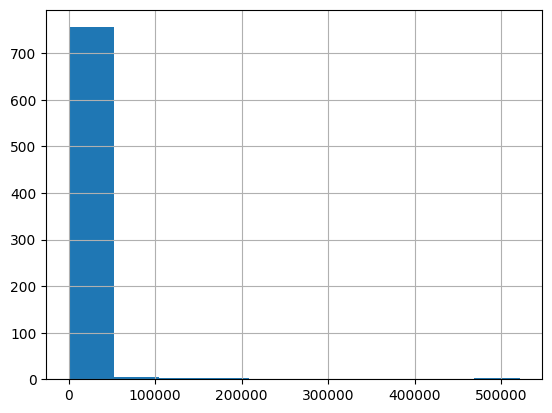

In [87]:
import matplotlib
df['cite_count'].hist()

<Axes: >

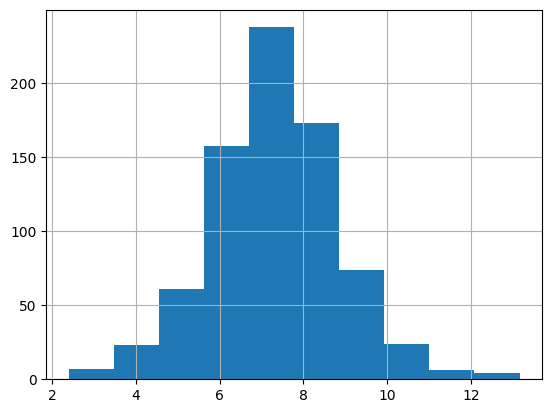

In [88]:
import numpy as np
df['log_cite_count'] = np.log(df['cite_count'])
df['log_cite_count'].hist()

Save what we have done so far.

In [89]:
df.to_pickle('sc_cases_cleaned.pkl',compression='gzip')
print(df)

                                             case_name opinion_type  \
0                  ERICK CORNELL CLAY v. UNITED STATES     majority   
1    HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...     majority   
2      CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN     majority   
4          STATE OF ALASKA v. UNITED STATES OF AMERICA     majority   
5    REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...     majority   
..                                                 ...          ...   
815  MICHAEL F. EASLEY, * GOVERNOR OF NORTH CAROLIN...     majority   
816  GAIL ATWATER, et al. v. CITY OF LAGO VISTA et al.     majority   
817  JAMES ALEXANDER, DIRECTOR, ALABAMA DEPARTMENT ...     majority   
818  UNITED STATES v. OAKLAND CANNABIS BUYERS' COOP...     majority   
819                     WILBERT K. ROGERS v. TENNESSEE     majority   

    date_standard authorship  x_republican  \
0      2003-03-04   GINSBURG           0.0   
1      2003-06-09    STEVENS           1.0   
2      20

## Iterating over documents in a dataframe

In the following, we show how to iterate over a dataframe and three different ways of how to tokenize documents.

1.   A corpus is a collection of texts used for analysis.
2.   A document is a single unit of text within a corpus.
3. A token is a basic unit of text after segmentation (tokenization). e.g. words, numbers, punctuation



In [91]:
# Spacy
processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    if i >= 10:
        break
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = nlp(text) # get sentences/tokens
    processed[docid] = document # add to dictionary

In [92]:
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50])

opinion 1: JUSTICE GINSBURG delivered the opinion of the Court.

 A motion by a federal prisoner for postconviction relief under 28 U.S.C. § 2255 is subject to a one-year time limitation that generally runs from "the date on which the judgment of conviction becomes final." 

 opinion 2: Justice Stevens delivered the opinion of the Court. 

In most of the United States, not including California, the minimum price paid to dairy farmers producing raw milk is regulated pursuant to federal marketing orders.  Those orders guarantee a uniform price for the producers,


Let's see in more detail what information we can extract from documents procesesd using spaCy:

In [93]:
for token in processed[0][:50]:
       print(token.text, token.pos_, token.dep_)

JUSTICE NOUN compound
GINSBURG PROPN nsubj
delivered VERB ROOT
the DET det
opinion NOUN dobj
of ADP prep
the DET det
Court PROPN pobj
. PUNCT punct


  SPACE dep
A DET det
motion NOUN nsubj
by ADP prep
a DET det
federal ADJ amod
prisoner NOUN pobj
for ADP prep
postconviction NOUN compound
relief NOUN pobj
under ADP prep
28 NUM nummod
U.S.C. PROPN compound
§ PROPN pobj
2255 NUM appos
is AUX ROOT
subject ADJ acomp
to ADP prep
a DET det
one NUM nummod
- PUNCT punct
year NOUN compound
time NOUN compound
limitation NOUN pobj
that PRON nsubj
generally ADV advmod
runs VERB relcl
from ADP prep
" PUNCT punct
the DET det
date NOUN pobj
on ADP prep
which PRON pobj
the DET det
judgment NOUN nsubj
of ADP prep
conviction NOUN pobj
becomes VERB relcl
final ADJ acomp
. PUNCT punct
" PUNCT punct


alternatively, we can preprocess with gensim

In [94]:


processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = simple_preprocess(text) # get sentences/tokens
    processed[docid] = document # add to dictionary
    if i > 100:
        break
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50]) # note how simple preprocess drops punctuation

opinion 1: ['justice', 'ginsburg', 'delivered', 'the', 'opinion', 'of', 'the', 'court', 'motion', 'by', 'federal', 'prisoner', 'for', 'postconviction', 'relief', 'under', 'is', 'subject', 'to', 'one', 'year', 'time', 'limitation', 'that', 'generally', 'runs', 'from', 'the', 'date', 'on', 'which', 'the', 'judgment', 'of', 'conviction', 'becomes', 'final', 'this', 'case', 'concerns', 'the', 'starting', 'date', 'for', 'the', 'one', 'year', 'limitation', 'it', 'presents'] 

 opinion 2: ['justice', 'stevens', 'delivered', 'the', 'opinion', 'of', 'the', 'court', 'in', 'most', 'of', 'the', 'united', 'states', 'not', 'including', 'california', 'the', 'minimum', 'price', 'paid', 'to', 'dairy', 'farmers', 'producing', 'raw', 'milk', 'is', 'regulated', 'pursuant', 'to', 'federal', 'marketing', 'orders', 'those', 'orders', 'guarantee', 'uniform', 'price', 'for', 'the', 'producers', 'but', 'through', 'pooling', 'mechanisms', 'require', 'the', 'processors', 'of']


or with nltk

In [95]:

processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = word_tokenize(text.lower()) # get sentences/tokens
    processed[docid] = document # add to dictionary
    if i > 100:
        break
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50]) # note that we just tokenize and keep all tokens


opinion 1: ['justice', 'ginsburg', 'delivered', 'the', 'opinion', 'of', 'the', 'court', '.', 'a', 'motion', 'by', 'a', 'federal', 'prisoner', 'for', 'postconviction', 'relief', 'under', '28', 'u.s.c', '.', '§', '2255', 'is', 'subject', 'to', 'a', 'one-year', 'time', 'limitation', 'that', 'generally', 'runs', 'from', '``', 'the', 'date', 'on', 'which', 'the', 'judgment', 'of', 'conviction', 'becomes', 'final', '.', "''", '§', '2255'] 

 opinion 2: ['justice', 'stevens', 'delivered', 'the', 'opinion', 'of', 'the', 'court', '.', 'in', 'most', 'of', 'the', 'united', 'states', ',', 'not', 'including', 'california', ',', 'the', 'minimum', 'price', 'paid', 'to', 'dairy', 'farmers', 'producing', 'raw', 'milk', 'is', 'regulated', 'pursuant', 'to', 'federal', 'marketing', 'orders', '.', 'those', 'orders', 'guarantee', 'a', 'uniform', 'price', 'for', 'the', 'producers', ',', 'but', 'through']


## Saving data

In [96]:
# save as python pickle
pd.to_pickle(processed, 'processed_corpus.pkl')
# delete it
import os
os.remove('processed_corpus.pkl')

In [ ]:
# Merging Data-frames Example
# Perform a left join:
# df_merged = pd.merge(df1,df2,on='id', how='left', validation='m:1')

# Web Scraping

## Downloading URL's

In [97]:

url = 'https://nypost.com/2026/01/26/sports/refs-admit-second-critical-mistake-on-broncos-backward-pass-call/' # shortened URL for court case
page = urllib.urlopen(url) # open the web page

html = page.read() # read web page contents as a string
print(html[:400])  # print first 400 characters
print()
print(html[-400:]) # print last 400 characters
print()
print(len(html),'characters in string.')   # print length of string

b'\n<!doctype html>\n<html lang="en-US">\n\n<head prefix="og: https://ogp.me/ns# fb: https://ogp.me/ns/fb#">\n\t<title>Refs admit second critical mistake on Broncos\' backward pass call</title>\n\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n\t<meta charset="UTF-8">\n\t<script>document.documentElement.classList.remove("no-js");</script>\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\n\t\t<!-- One'

b'w-ad-wrapper\');\n\t\t\tif (typeof googletag !== \'undefined\') {\n\t\t\t\tgoogletag.cmd.push(function() {\n\t\t\t\t\tif (window.definedSlots && -1 !== window.definedSlots.indexOf("div-gpt-ad-custom")) {\n\t\t\t\t\t\tgoogletag.display("div-gpt-ad-custom");\n\t\t\t\t\t} else {\n\t\t\t\t\t\tconsole.log(\'div-gpt-ad-custom not a defined slot\', window.definedSlots || []);\n\t\t\t\t\t}\n\t\t\t\t});\n\t\t\t}\n\t\t</script>\n\t</div></div></div>\n</body>\n</html>\n'

500441 characters in string.


## Parsing HTML

In [98]:
# Parse raw HTML
# !pip install beautifulsoup4

soup = BeautifulSoup(html) # parse html of web page
print(soup.title) # example usage: print title item

<title>Refs admit second critical mistake on Broncos' backward pass call</title>


In [99]:
# extract text
text = soup.get_text() # get text (remove HTML markup)
lines = text.splitlines() # split string into separate lines
print(len(lines)) # print number of lines

1155


In [100]:
lines = [line for line in lines if line != ''] # drop empty lines
print(len(lines)) # print number of lines

290


In [101]:
print(lines[:20]) # print first 20 lines

["Refs admit second critical mistake on Broncos' backward pass call", ' ', ' ', ' ', ' ', ' ', 'Primary Menu', 'Sections', 'US News', 'Metro', 'Long Island', 'Politics', 'World News', 'Page Six', 'Sports', 'NFL', 'MLB', 'Olympics', 'NBA', 'NHL']


## Removing unicode characters

In [102]:
uncode_str = 'Visualizations\xa0'
fixed = unidecode(uncode_str) # example usage
print([uncode_str],[fixed]) # print cleaned string (replaced with a space)

['Visualizations\xa0'] ['Visualizations ']


# Quantity of Text

Count words per document.

<Axes: >

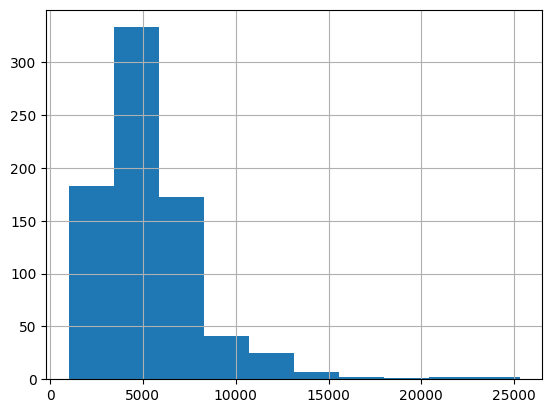

In [103]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split())

# apply to our dataframe
df['num_words'] = df['opinion_text'].apply(get_words_per_doc)
df['num_words'].hist()

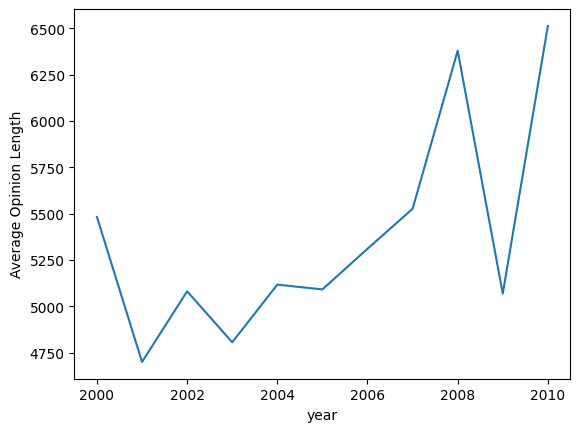

In [104]:
# plot length by year
ax = df.groupby('year')['num_words'].mean().plot()
ax.set_ylabel('Average Opinion Length')
import matplotlib.pyplot as plt
plt.show()

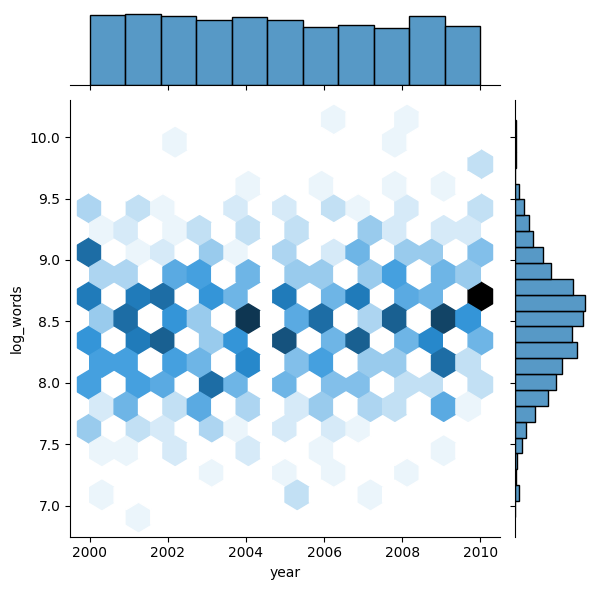

In [105]:
df['log_words'] = np.log(df['num_words'])
import seaborn as sns
sns.jointplot(data=df,x='year', y='log_words',kind='hex')

Build a frequency distribution over words with `Counter`.

In [106]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['opinion_text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 31600),
 ('of', 15978),
 ('to', 12330),
 ('a', 8954),
 ('that', 8521),
 ('in', 8324),
 ('and', 7619),
 ('at', 5044),
 ('for', 4496),
 ('is', 4032),
 ('not', 3577),
 ('l.', 3216),
 ('ed.', 3190),
 ('as', 3048),
 ('or', 2904),
 ('s.', 2828),
 ('§', 2738),
 ('ct.', 2735),
 ('court', 2615),
 ('on', 2587)]

# Dictionary / Matching Methods

## Sentiment Analysis

In [107]:
# Dictionary-Based Sentiment Analysis

# textblob sentiment analysis: https://github.com/sloria/TextBlob

nlp.add_pipe('spacytextblob')
doc = nlp(df.iloc[0]["opinion_text"])

print("polarity", doc._.blob.polarity )
print ("subjectivity", doc._.blob.subjectivity)

polarity 0.05404135338345859
subjectivity 0.5065358709273183


**What is polarity and subjectivity? **

Polarity measures the emotional valence of the text. Goes from -1 (negative sentiment) to 1 (positive sentiment).

Subjectivity measures how opinionated (1) vs. factual (0) each article is.

*For this dataset, how would we expect the distribution of sentiment to be?*

*Subjectivity?*

In [61]:
# sample 10% of the dataset
dfs = df.sample(frac=.1)
# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    #return sid.polarity_scores(snippet)['compound']
    return nlp(snippet)._.blob.polarity
dfs['sentiment'] = dfs['opinion_text'].apply(get_sentiment)

<Axes: >

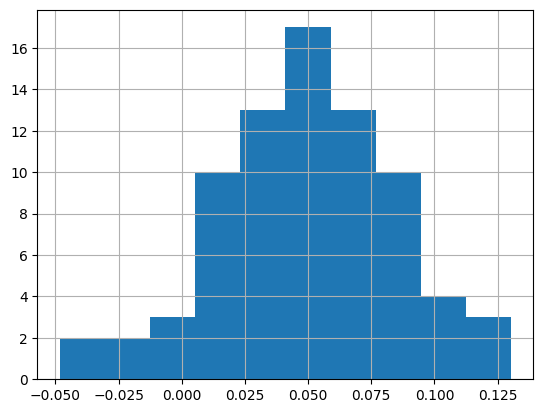

In [62]:
dfs['sentiment'].hist()

<Axes: >

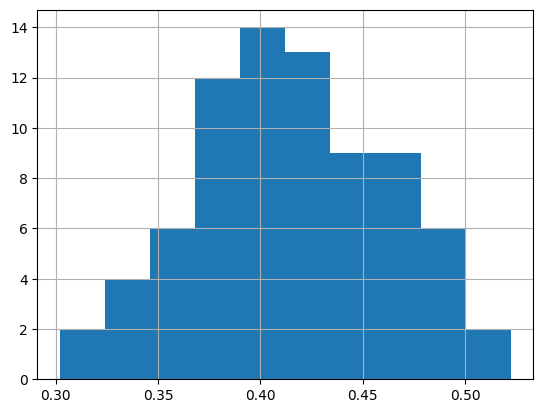

In [63]:
# apply compound sentiment score to data-frame
def get_subjectivity(snippet):
    #return sid.polarity_scores(snippet)['compound']
    return nlp(snippet)._.blob.subjectivity
dfs['subjectivity'] = dfs['opinion_text'].apply(get_subjectivity)
dfs['subjectivity'].hist()

In [64]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['opinion_text']]

[' Court. \n\n A civil case commenced in state court may, as a general matter, be removed by the defenda',
 ' \n\n  The Bankruptcy Code provides a stamp-tax exemption for any asset transfer "under a plan confirm',
 ' \n\n The question is whether the provision of the Fair Labor Standards Act of 1938 (FLSA or Act), tha',
 "t. \n\n We granted certiorari to resolve whether the Nevada Supreme Court's refusal to extend full fai",
 '\n\nThe State of South Carolina brought this original action against the State of North Carolina, seek']

In [65]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['opinion_text']]

[' \n\nWhen an alien is found ineligible to remain in the United States, the process for selecting the c',
 "he Court.\n\nAs Enron Corporation's financial difficulties became public in 2001, petitioner Arthur An",
 'he Court. \n\n InTotten v. United States,92 U.S. 105, 23 L. Ed. 605 (1876), we held that public policy',
 'he Court. \n\nSection 236(c) of the Immigration and Nationality Act, 66 Stat 200, as amended, 110 Stat',
 " \n\n The case presents two questions: whether due process prohibits Arizona's use of an insanity test"]

<Axes: >

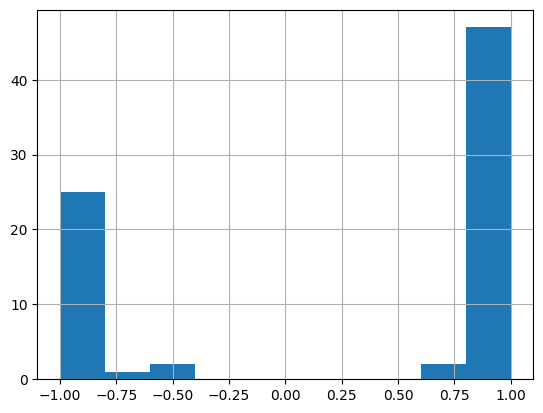

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment_vader'] = dfs['opinion_text'].apply(get_sentiment)

dfs['sentiment_vader'].hist()

## Sentiment Analysis with Huggingface

In [69]:
class OpinionDataset(Dataset):
    def __init__(self, df):
        super().__init__()
        self.df = df
    def __len__(self):
        return len(df)

    def __getitem__(self, i):
        return df.iloc[i]["opinion_text"][:512] # BERT max seq length


dataset = OpinionDataset(df)
sentiments = []

for out in tqdm(pipe(dataset, batch_size=16), total=len(dataset)):
        if out['label'] == "NEGATIVE":
            sentiments.append(-1*out['score'])
        else:
            sentiments.append(out['score'])

  0%|          | 0/768 [00:00<?, ?it/s]

<Axes: >

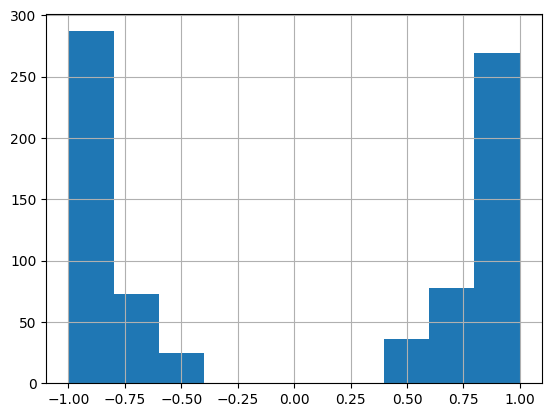

In [70]:
df['sentiments'] = sentiments
df['sentiments'].hist()

## Why are they so different?

From class: **Off-the-shelf scores are corpus specific, eg online writing may not work for legal text, for example.**



1.   VADER was designed for social media / short opinion text and includes many
hand-built heuristics (e.g., “VERY good!!!”, “not good”, “:)”).
2.   TextBlob sentiment is based on a more general-purpose lexicon approach (Pattern/TextBlob) and is not as tuned to punctuation/casing emphasis.


## What about supervised learning methods?

From class: **Sentiment scores that are trained on annotated datasets also learn from the correlated non-sentiment information.**



1.   These are highly technical legal documents, probably the model we are using has not been trained in a lot of these (also BERT has a token restriction).
2.   You will probably be better off annotating some documents and fine-tuning one of these models, rather than using it off the shelf.


## StopWords

In [108]:
#from nltk.corpus import stopwords
#stopwords = set(stopwords.words('english'))
#stopwords
from spacy.lang.en import stop_words
print(stop_words.STOP_WORDS)

{'four', 'a', 'make', 'so', 'is', 'unless', 'everyone', 'that', 'nobody', "'ll", 'whom', 'ten', 'above', "'d", 'forty', 'as', 'many', 'am', 'perhaps', 'any', 'whenever', '‘m', 'less', 'first', 'latter', 'next', 'you', 'very', '‘d', 'no', 'also', 'they', 'used', 'this', 'should', 'beyond', 'over', 'hereupon', 'of', 'three', 'would', 'been', 'hence', 'these', 'everywhere', 'thereupon', 'whereas', 'within', 'was', 'ourselves', 'one', 'please', 'herein', 'themselves', 'nevertheless', 'together', 'cannot', 'your', 'which', 'he', 'than', 'around', 'beside', 'thru', 'every', 'yourselves', 'either', 'some', 'whoever', 'yours', 'bottom', 'same', 'per', 'already', 'me', 'its', 'own', 'even', 'among', 'below', 'what', 'to', 'front', 'wherein', 'once', 'herself', 'somehow', 'such', 'may', 'out', 'meanwhile', 'put', 'few', 'therefore', 'their', 'hereafter', 'it', 'amongst', 'where', 'more', 'another', 'somewhere', 'on', 'much', 'anyone', 'be', '’re', 'toward', 'while', 'fifteen', 'across', 'seemed'

In [109]:
#stopfreq = np.sum([freqs[x] for x in stopwords])
#stopfreq # 174132 for NLTK stopwords
stopwords = stop_words.STOP_WORDS
stopfreq = np.sum([freqs[x] for x in stopwords])
stopfreq

np.int64(191526)

In [110]:
otherfreq = np.sum([freqs[x] for x in freqs if x not in stopwords])
otherfreq

np.int64(306516)

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [111]:
import re

docs = dfs[:5]['opinion_text']

# Extract words after justice.
for doc in docs:
    print(re.findall(r'Justice \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Justice Scalia ']
['JUSTICE REHNQUIST ']
['Justice Rehnquist ']
['Justice Rehnquist ', 'justice system ', 'Justice that ', 'Justice Frankfurter ']
['Justice Souter ', 'justice so ', 'Justice Kennedy ', 'justice to ', 'justice so ']


In [112]:
# Extract hyphenated words
for doc in docs:
    print(re.findall(r'[a-z]+-[a-z]+',
                     doc,
                     re.IGNORECASE))

['Respondent-Appellant', 'country-selection', 'step-three', 'last-resort', 'removable-but', 'country-selection', 'K-S', 'two-sentence']
['crisis-response', 'in-house', 'off-balance', 'black-and', 'in-house', 'e-mailed', 'non-recurring', 'e-mail', 'e-mail', 'crisis-response', 'e-mail', 'e-mail', 'self-incrimination', 'attorney-client', 'X-Citement', 'plain-error']
['self-styled', 'high-ranking', 'high-risk', 'third-party', 'subject-matter', 'breach-of', 'wrongful-death', 'investigation-related', 'case-by']
['first-degree', 'first-degree', 'first-degree', 'no-bail', 'then-current', 'near-total', 'one-in', 'no-shows', 'Verdugo-Urquidez', 'first-degree', 'post-removal']
['first-degree', 'mental-health', 'first-degree', 'two-part', 'two-part', 'side-by', 'Anglo-American', 'product-of', 'mental-illness', 'irresistible-impulse', 'irresistible-impulse', 'product-of', 'mental-illness', 'Anglo-American', 'two-part', 'product-of', 'mental-illness', 'mental-health', 'irresistible-impulse', 'two-pa

In [113]:
# extract citations
for i, doc in enumerate(docs):
    finder = re.finditer('\d+ [^\s]+ \d+', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder:
        print(i, m.span(),m.group()) # location (start,end) and matching string

0 (651, 663) 329 F.3d 630
0 (665, 678) 631 (CA8 2003
0 (2532, 2545) 540 U.S. 1176
0 (2872, 2886) 116 Stat. 2192
0 (7397, 7411) 110 Stat. 3009
0 (7412, 7423) 600 to 3009
0 (10181, 10193) 543 U.S. 335
0 (11774, 11785) 540 U.S. 20
0 (12282, 12294) 359 U.S. 385
0 (15124, 15136) 404 U.S. 336
0 (15237, 15249) 251 U.S. 210
0 (15334, 15346) 196 U.S. 207
0 (20420, 20432) 453 U.S. 280
0 (23358, 23370) 533 U.S. 678
0 (23451, 23463) 543 U.S. 371
0 (24342, 24353) 426 U.S. 67
0 (26326, 26339) 110 Stat 3009
0 (26600, 26612) 357 U.S. 185
0 (26987, 26998) 459 U.S. 21
0 (27307, 27318) 8 (1995). 8
0 (28208, 28220) 264 F.2d 926
0 (28271, 28283) 262 F.2d 471
0 (28446, 28458) 321 (DC 1958
0 (29938, 29950) 413 F.2d 644
0 (29952, 29965) 654 (CA2 1969
0 (30442, 30457) 1000 (SDNY 1982
0 (30479, 30491) 862 F.2d 362
0 (30493, 30506) 369 (CA1 1988
0 (32822, 32833) 379 U.S. 48
0 (34118, 34129) 523 U.S. 26
1 (4800, 4812) 374 F.3d 281
1 (4814, 4827) 286 (CA5 2004
1 (9151, 9163) 164 U.S. 492
1 (9777, 9790) 145 F.3d 12

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3088990580.py:3: SyntaxWarning: invalid escape sequence '\d'
  finder = re.finditer('\d+ [^\s]+ \d+', # pattern to match ([^\s] means non-white-space)


In [114]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'

In [115]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [ ]:
re.search(pattern2,'The Congress tried to calm uncertainty in the economy.')

<re.Match object; span=(46, 53), match='economy'>

In [117]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.')

In [118]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.', re.IGNORECASE)

<re.Match object; span=(4, 12), match='Congress'>

In [119]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [120]:
indicates_uncertainty('The White House tried to calm uncertainty in the economy.')

True

In [ ]:
indicates_uncertainty('The White House tried to calm uncertainty in the markets.')

False

In [121]:
df['uncertainty'] = df['opinion_text'].apply(indicates_uncertainty)

In [122]:
df.uncertainty.mean()

np.float64(0.057291666666666664)

<Axes: xlabel='year'>

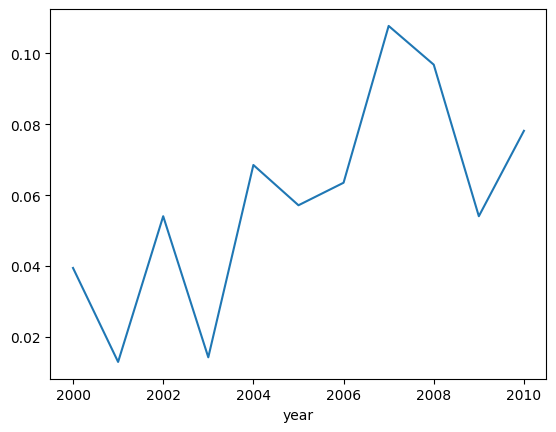

In [123]:
df.groupby('year')['uncertainty'].mean().plot()

## WordNet

These examples are based on the [NLTK tutorial](https://www.nltk.org/howto/wordnet.html).

In [124]:
wn.synsets('judge')

[Synset('judge.n.01'),
 Synset('evaluator.n.01'),
 Synset('judge.v.01'),
 Synset('evaluate.v.02'),
 Synset('estimate.v.01'),
 Synset('pronounce.v.02'),
 Synset('judge.v.05')]

In [125]:
wn.synsets('judge', pos='v') # can filter on part of speech

[Synset('judge.v.01'),
 Synset('evaluate.v.02'),
 Synset('estimate.v.01'),
 Synset('pronounce.v.02'),
 Synset('judge.v.05')]

In [127]:
judge = wn.synset('judge.n.01')
judge

Synset('judge.n.01')

In [128]:
judge.definition()

'a public official authorized to decide questions brought before a court of justice'

In [129]:
wn.synset('estimate.v.01').examples()

['I estimate this chicken to weigh three pounds']

In [130]:
# categories to which "judge.n.01" belongs
judge.hypernyms()

[Synset('official.n.01'), Synset('adjudicator.n.01')]

In [131]:
# the root category of "judge.n.01"
judge.root_hypernyms()

[Synset('entity.n.01')]

In [132]:
wn.synset('estimate.v.01').root_hypernyms()

[Synset('think.v.03')]

In [133]:
# members of the "judge.n.01" category
judge.hyponyms()

[Synset('chief_justice.n.01'),
 Synset('praetor.n.01'),
 Synset('qadi.n.01'),
 Synset('ordinary.n.01'),
 Synset('magistrate.n.01'),
 Synset('alcalde.n.01'),
 Synset('trial_judge.n.01'),
 Synset('daniel.n.02'),
 Synset('doge.n.01'),
 Synset('justiciar.n.01'),
 Synset('trier.n.01'),
 Synset('recorder.n.03')]

In [134]:
# "holonym" is a part of a whole
juror = wn.synset('juror.n.01')
juror.member_holonyms()

[Synset('jury.n.01')]

In [135]:
# can find "lowest common hypernyms":
judge.lowest_common_hypernyms(juror)

[Synset('person.n.01')]

In [136]:
# "lemmas" are specific senses of a specific word.
judge.lemmas()

[Lemma('judge.n.01.judge'),
 Lemma('judge.n.01.justice'),
 Lemma('judge.n.01.jurist')]

In [137]:
[lemma.name() for lemma in judge.lemmas()]

['judge', 'justice', 'jurist']

In [138]:
# lemmas have additional properties
judge_lemma = judge.lemmas()[0]
judge_lemma.derivationally_related_forms()

[Lemma('judicial.s.01.judicial'),
 Lemma('judicial.a.02.judicial'),
 Lemma('judicial.a.03.judicial'),
 Lemma('judgeship.n.01.judgeship'),
 Lemma('judge.v.05.judge'),
 Lemma('judge.v.05.adjudicate'),
 Lemma('decide.v.02.adjudicate')]

In [139]:
good = wn.synset('good.a.01').lemmas()[0]
good.antonyms()

[Lemma('bad.a.01.bad')]

In [140]:
# verb frames summarize the different semantic contexts that a verb can be used
judge_verb = wn.synset('estimate.v.01').lemmas()[4]
judge_verb.frame_strings()

['Somebody judge something', 'Somebody judge PP', 'Somebody judge that CLAUSE']

In [ ]:
# measure similarity in the dictionary between words
judge.path_similarity(wn.synset('juror.n.01'))

0.1111111111111111

In [ ]:
judge.path_similarity(wn.synset('cat.n.01'))

0.08333333333333333

In [ ]:
# Wu-Palmer similarity.
judge.wup_similarity(juror)

0.5454545454545454

In [ ]:
judge.wup_similarity(wn.synset('cat.n.01'))

0.5217391304347826

In [ ]:
# Can iterate over all synsets; e.g., all nouns:
for synset in list(wn.all_synsets('n')):
    if 'judg' in str(synset):
        print(synset)

Synset('judgeship.n.01')
Synset('judgment.n.02')
Synset('value_judgment.n.01')
Synset('judgment.n.03')
Synset('confession_of_judgment.n.01')
Synset('default_judgment.n.01')
Synset('final_judgment.n.01')
Synset('judgment_in_personam.n.01')
Synset('judgment_in_rem.n.01')
Synset('judgment_of_dismissal.n.01')
Synset('judgment_on_the_merits.n.01')
Synset('summary_judgment.n.01')
Synset('judgment.n.06')
Synset('judgment.n.04')
Synset('prejudgment.n.01')
Synset('judgment.n.01')
Synset('judges.n.01')
Synset('back_judge.n.01')
Synset('field_judge.n.01')
Synset('judge.n.01')
Synset('judge_advocate.n.02')
Synset('judge_advocate.n.01')
Synset('judge_advocate_general.n.01')
Synset('line_judge.n.01')
Synset('side_judge.n.01')
Synset('trial_judge.n.01')
Synset('judgment_lien.n.01')
Synset('judgment_day.n.01')


**Exercise**. Use wordnet to expand the set of words in the Baker-Bloom-Davis dictionary and re-compute policy uncertainty scores by year.